### Entrada de dados

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pylab

data = pd.read_csv("edges2.csv",names=["Inicio", "Fim", "Peso"], encoding = "ISO-8859-1")
data

,Inicio,Fim,Peso
0,a,e,5
1,a,f,1
2,a,l,2
3,b,c,11
4,b,i,9
5,c,d,3
6,c,f,3
7,c,g,5
8,c,j,6
9,d,n,5


In [2]:
for i in range(len(data["Inicio"])):
    G = nx.Graph()
    G.add_edge(data["Inicio"][i], data["Fim"][i], weight=data["Peso"][i])

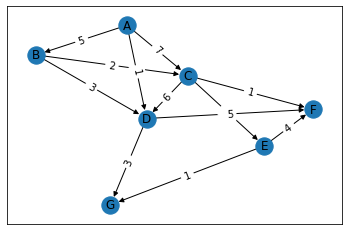

In [3]:

def plot(Grafo):
    G = nx.Graph()
    for i in range(len(Grafo["Inicio"])):
        G.add_edge(Grafo["Inicio"][i], Grafo["Fim"][i], weight=Grafo["Peso"][i])

    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos, arrows=True) #, arrows=True
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    pylab.show()
    return G
retorno = plot(data)

In [4]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

{('A', 'B'): 5,
 ('A', 'C'): 7,
 ('A', 'D'): 1,
 ('B', 'C'): 2,
 ('C', 'D'): 6,
 ('C', 'E'): 5,
 ('D', 'B'): 3,
 ('D', 'F'): 5,
 ('D', 'G'): 3,
 ('E', 'F'): 4,
 ('F', 'C'): 1,
 ('G', 'E'): 1}

In [51]:
vertice_atual = "a"
vertice_anterior = -1
caminhos = []
vertices_ = []
while len(caminhos) < len(vertices):
    aux = np.Inf
    for i in N:
        if vertice_atual == i[0]:
            if N[i] < aux:
                aux = N[i]
                print(aux)
                vertice_atual_novo = i
                
    vertice_atual = vertice_atual_novo[1]
    if len(caminhos) == 0:
        caminhos.append([aux,vertice_atual_novo[0]])
    else:
        aux += caminhos[len(caminhos)-1][0]
        caminhos.append([aux,vertice_atual_novo[0]])
print(aux)
print(caminhos)

NameError: name 'vertice_atual_novo' is not defined

In [87]:
N = {}
vertices = []
for i in range(len(data["Inicio"])):
    if data["Inicio"][i] not in vertices:
        vertices.append(data["Inicio"][i])
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

{('A', 'B'): 5,
 ('A', 'C'): 7,
 ('A', 'D'): 1,
 ('B', 'C'): 2,
 ('C', 'D'): 6,
 ('C', 'E'): 5,
 ('D', 'B'): 3,
 ('D', 'F'): 5,
 ('D', 'G'): 3,
 ('E', 'F'): 4,
 ('F', 'C'): 1,
 ('G', 'E'): 1}

In [206]:
N = {}
for i in range(len(data["Inicio"])):
    N[(data["Inicio"][i],data["Fim"][i])] = data["Peso"][i]
N

todos_vertices = []
vertices_encontraveis = []

for i in N:
    if i[0] not in todos_vertices:
        todos_vertices.append(i[0])
    if i[1] not in todos_vertices:
        todos_vertices.append(i[1])
    if i[1] not in vertices_encontraveis:
        vertices_encontraveis.append(i[1])
vertices_encontraveis
todos_vertices = sorted(todos_vertices)


In [153]:
for k in todos_vertices:

    vertice_atual = k
    vertice_inicial = vertice_atual
    vertice_anterior = -1
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]


    while(True):
        aux = np.Inf
        for i in N:
            if vertice_atual == i[0]:
                #Menor vertice (proximo)
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])
                
                if N[i] < aux:
                    aux = caminhos[i[1]][1]
                    
                    if i[1] not in vertices_descobertos:
                        
                        vertices_descobertos.append(i[1])
                        
                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                    #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                    #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                    proximo_vertice = i[1]
                    
        if proximo_vertice in vertices_passados:
            l3 = [x for x in vertices_descobertos if x not in vertices_passados]
            
            if(len(l3)) == 0:
                break
            else:
                vertice_atual = l3[0]
        else:
            vertice_atual = proximo_vertice
    print("Vertice Inicial: {} -> {}".format(k,caminhos))

Vertice Inicial: a -> {'a': ['a', 0], 'e': ['a', 5], 'f': ['a', 1], 'l': ['a', 2], 'b': ['', inf], 'c': ['', inf], 'i': ['', inf], 'd': ['', inf], 'g': ['', inf], 'j': ['', inf], 'n': ['', inf], 'h': ['', inf], 'm': ['', inf], 'k': ['', inf]}
Vertice Inicial: e -> {'a': ['', inf], 'e': ['e', 0], 'f': ['', inf], 'l': ['', inf], 'b': ['e', 1], 'c': ['', inf], 'i': ['', inf], 'd': ['', inf], 'g': ['', inf], 'j': ['', inf], 'n': ['', inf], 'h': ['e', 8], 'm': ['h', 15], 'k': ['m', 24]}
Vertice Inicial: f -> {'a': ['', inf], 'e': ['', inf], 'f': ['f', 0], 'l': ['', inf], 'b': ['', inf], 'c': ['', inf], 'i': ['f', 6], 'd': ['', inf], 'g': ['', inf], 'j': ['', inf], 'n': ['', inf], 'h': ['', inf], 'm': ['f', 4], 'k': ['m', 13]}
Vertice Inicial: l -> {'a': ['', inf], 'e': ['', inf], 'f': ['', inf], 'l': ['l', 0], 'b': ['', inf], 'c': ['', inf], 'i': ['', inf], 'd': ['', inf], 'g': ['', inf], 'j': ['', inf], 'n': ['', inf], 'h': ['', inf], 'm': ['', inf], 'k': ['', inf]}
Vertice Inicial: b -> {

In [189]:
vertice_atual = "A"
vertice_inicial = vertice_atual
vertice_anterior = -1
caminhos = {}

for i in vertices:
    if i != vertice_atual:
        caminhos[i] = ["",np.inf]
    else:
        caminhos[i] = [i,0]

for i in range(10):
    aux = np.Inf
    proximo_vertice = ""
    array = caminhos
    for i in N:
        if vertice_atual == i[0]:
            if N[i] + caminhos[i[0]][1] < caminhos[i[1]][1]:
                caminhos[i[1]][0] = i[0]
                caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
            if N[i] < aux:
                aux = N[i]
                proximo_vertice = i[1]
    vertice_atual = proximo_vertice


print(caminhos)


KeyError: 'a'

In [208]:
    vertice_atual = "A"
    vertice_inicial = vertice_atual
    vertice_anterior = -1
    caminhos = {}
    vertices_descobertos = []
    vertices_passados = []

    for i in todos_vertices:
        if i != vertice_atual:
            caminhos[i] = ["",np.inf]
        else:
            vertices_passados.append(i)
            vertices_descobertos.append(i)
            caminhos[i] = [i,0]

    print(caminhos)

    for i in range(10):
        aux = np.Inf
        for i in N:
            if vertice_atual == i[0]:
                #Menor vertice (proximo)
                if i[0] not in vertices_passados:
                    vertices_passados.append(i[0])
                
                if i[1] not in vertices_descobertos:
                    vertices_descobertos.append(i[1])
                        
                if caminhos[i[1]][1] > N[i] + caminhos[i[0]][1]:
                    #Salva o valor do proximo vertice no vetor
                    caminhos[i[1]][1] = N[i] + caminhos[i[0]][1]
                    #salva o caminho desse vertice (valor atual + valor anterior)
                    caminhos[i[1]][0] = i[0]
                    proximo_vertice = i[1]
        
        print(proximo_vertice)
        if proximo_vertice in vertices_passados:
            l3 = [x for x in vertices_descobertos if x not in vertices_passados]
            if(len(l3)) == 0:
                break
            else:
                vertice_atual = l3[0]
        else:
            vertice_atual = proximo_vertice
    print(caminhos)

{'A': ['A', 0], 'B': ['', inf], 'C': ['', inf], 'D': ['', inf], 'E': ['', inf], 'F': ['', inf], 'G': ['', inf]}
D
G
E
E
C
C
C
{'A': ['A', 0], 'B': ['D', 4], 'C': ['B', 6], 'D': ['A', 1], 'E': ['G', 5], 'F': ['D', 6], 'G': ['D', 4]}
